In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA

In [2]:
df_phising=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\Phishing_Email.csv")

In [3]:
df_phising

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,press clippings - letter on californian utilit...,Safe Email


In [4]:
df_phising.dropna()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,press clippings - letter on californian utilit...,Safe Email


In [5]:
df_phising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  18634 non-null  object
 1   Email Type  18650 non-null  object
dtypes: object(2)
memory usage: 291.5+ KB


In [6]:
df_phising.to_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\Phishing_Email.csv", index=False)

 ### - VF herramienta de procesamiento del lenguaje natural que se utiliza para convertir un conjunto de documentos de texto en una matriz de características, con la finalidad de identificar los términos que aparecen con más frecuencia en los documentos o patrones que se repiten y hacer una grafica de densidad<br>
 - KM algoritmo de agrupamiento que se utiliza para dividir un conjunto de datos , logrando una agrupación de documentos de texto más efectiva, en combinacion con el anterior VF.<br>
 - silhouette_score: Para evaluar los grupos de puntos, se usa silhouette_score, usado para evaluar la calidad de los resultados de agrupación, representando la similitud entre el punto de datos y su propio cluster en comparación con otros clusters, loc uales se usan para agrupar datos de similares acarcteristicas ( ejemplo):  si se tiene un conjunto de datos de clientes, se pueden utilizar clusters para identificar grupos de clientes que tienen intereses similares.<br>
  Si el valor de silhouette_score es  alto indica que el punto de datos está bien clasificado en su propio cluster y no es similar a los puntos de datos de otros clusters y un  valor  bajo indica lo contrario

In [7]:
df_phising_vectorizado = df_phising.copy()
# Características (X)
# X consiste en una lista de cadenas de texto
X = df_phising_vectorizado['Email Text']

# Eliminar los valores NaN del campo Email Text
df_phising_vectorizado.dropna(subset=["Email Text"], inplace=True)

# Convierte el objeto de serie de texto en una lista de documentos de texto sin procesar
texto_sin_procesar = df_phising_vectorizado["Email Text"].tolist()

#covertimos la lista en una lista de documentos sin procesar
#lista_no_procesada = []

#iteramos lista de correos electrónicos sin procesar 
#for mail in texto_sin_procesar:
     #Dentro del bucle, se recorre cada correo electrónico (mail) y se divide en líneas(mail.split("\n"))
     #for linea_email in mail.split("\n"):
         #cada línea en minúsculas 
         #linea_lower= linea_email.lower()
        # lista_no_procesada.append(linea_lower)
    

# Vectorizamos el texto usando TfidfVectorizer y  con vectorizer transformamos el conjunto de datos  a una matriz de valores que representan la frecuencia de cada palabra en cada documento(X_Tf)
vectorizer = TfidfVectorizer()
X_Tf = vectorizer.fit_transform(texto_sin_procesar)

# Reducir el número de dimensiones de la matriz de características
n_components = 100
X_svd = TruncatedSVD(n_components).fit_transform(X_Tf)

# Agrupar los correos electrónicos utilizando K-means

agrupamiento = KMeans(n_clusters=2).fit(X_Tf)

# Etiquetar las muestras como 'normal' o 'anómala' según la distancia al centroide
df_phising_vectorizado['Etiqueta'] = agrupamiento.predict(X_Tf)
df_phising_vectorizado['Etiqueta'] = df_phising_vectorizado['Etiqueta'].apply(lambda x: 'anormal' if x == 1 else 'normal')# funcion anonima que dice que si x=1 es anomala y sino es normal

# Verificar la longitud de la matriz de características y el índice del DataFrame
print(len(X_svd))
print(len(df_phising_vectorizado))

#se crean 2 columnas  nuevas cluster y Etiaueta
df_phising_vectorizado.head(1)

# Guardar el DataFrame con las etiquetas
df_phising_vectorizado.to_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\resultados_analisis_phishing.txt", index=False, sep='\t')

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


18634
18634


In [13]:
df_phising_vectorizado.head(20)




,Email Text,Email Type,Etiqueta,Cluster
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,anormal,1
1,the other side of * galicismos * * galicismo *...,Safe Email,anormal,4
2,re : equistar deal tickets are you still avail...,Safe Email,anormal,2
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,anormal,4
4,software at incredibly low prices ( 86 % lower...,Phishing Email,anormal,1
5,global risk management operations sally congra...,Safe Email,anormal,1
6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email,anormal,0
7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email,anormal,1
8,"we owe you lots of money dear applicant , afte...",Phishing Email,anormal,4
9,re : coastal deal - with exxon participation u...,Safe Email,anormal,4


### GENERO UN GRAFICO DE DENSIDAD PARA SABER LA AGRUPACION DE PALABRAS EN EL TEXTO  Y QUE TENGAN CIERTA SIMILITUD PARA DETECTAR LAS ANOMALIAS

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\victo\AppData\Local\Temp\ipykernel_14432\787204150.py:64: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reducido[:18634, 0], X_reducido[:18634, 1], c=[colores_clusters(cluster) for cluster in df_phising_vectorizado['Cluster']], cmap='magma', alpha=0.2, s=500, label='Anomalías')
C:\Users\victo\AppData\Local\Temp\ipykernel_14432\787204150.py:66: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  pl

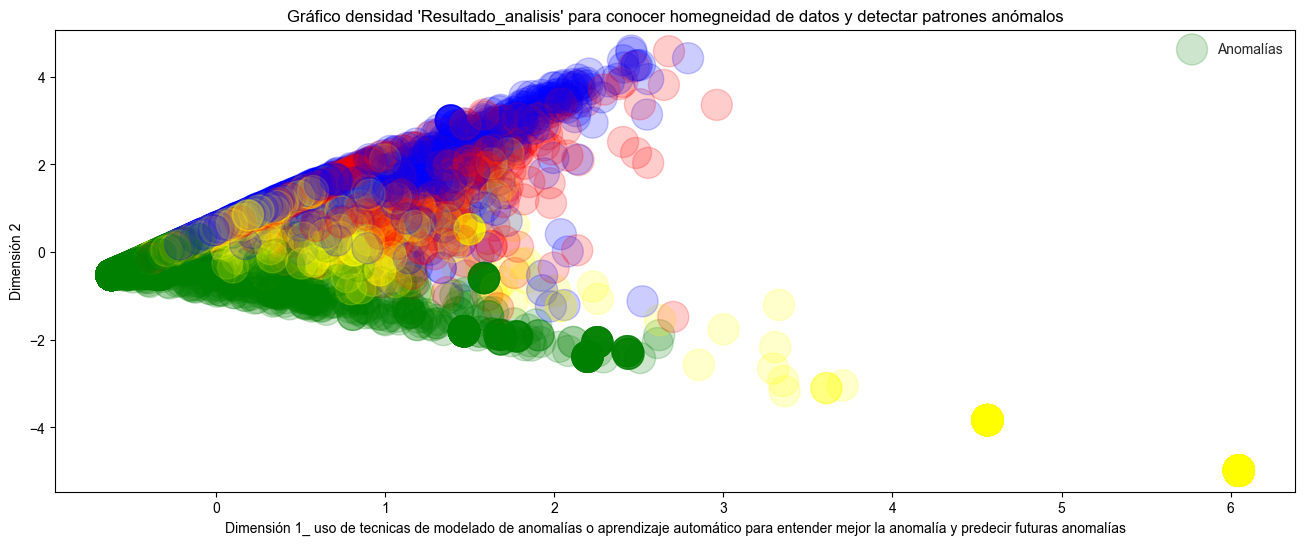

In [9]:
from sklearn.preprocessing import StandardScaler

#funcion para reducir la dimensionalidad de un vector de tamaño 40000 a una variable que espera un vector de tamaño 1.
def reducir_dimensionalidad_sparse(X, n_columnas=2):

    # Usar TruncatedSVD para reducir la dimensionalidad de la matriz dispersa
    svd = TruncatedSVD(n_components=n_columnas)
    X_reducido = svd.fit_transform(X)

    # Normalizar los resultados
    scaler = StandardScaler()
    X_reducido = scaler.fit_transform(X_reducido)

    return X_reducido
    


# Seleccionar la columna de interés
with open(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\resultados_analisis_phishing.txt", 'r', encoding='utf-8') as r:
    contenido = r.readlines()#divide en lineas el text


# Vectorizar el texto usando TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tf = vectorizer.fit_transform(contenido)

# Aplicar reducción de dimensionalidad directamente sobre la matriz dispersa
X_reducido = reducir_dimensionalidad_sparse(X_tf, n_columnas=2)


# Aplicar k-means para agrupar los textos
n_clusters = 5  # Puedes ajustar este valor según tu necesidad
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Obtener las etiquetas de clústeres para todo X_tf
labels = kmeans.fit_predict(X_tf)

# Ajustar las etiquetas al tamaño del DataFrame
labels_subset = labels[:len(df_phising_vectorizado)]

# Agregar las etiquetas al DataFrame
df_phising_vectorizado['Cluster'] = labels_subset

#mapeo las etiquetas de clúster (c) para que scatter, asignadole lo qu espera no valores numericos sino  colores 

def colores_clusters(cluster):
    if cluster == 0:
        return "red"
    elif cluster == 1:
        return "green"
    elif cluster == 2:
        return "blue"
    else:
        return "yellow"

# convierto la matriz _matrix a matriz_array, por ser mas faciles de trabajar
#X_tf_ndarray = X_tf.toarray()
#reduzco con la funcion numpy squeenze, la diemnsion primera de una matriz, en nuestro caso (40000, dimesion) eleimina dimension quedansoe con el numero de valores solo
#x_reducido = X_tf_ndarray[:, 0].squeeze()
#y_reducido = X_tf_ndarray[:, 1].squeeze()

#pintamos
plt.figure(figsize=(16,6))
plt.scatter(X_reducido[:18634, 0], X_reducido[:18634, 1], c=[colores_clusters(cluster) for cluster in df_phising_vectorizado['Cluster']], cmap='magma', alpha=0.2, s=500, label='Anomalías')
# Cambiar el color del fondo
plt.style.use('seaborn-darkgrid')
#titulo y etiqyuetas
plt.title("Gráfico densidad 'Resultado_analisis' para conocer homegneidad de datos y detectar patrones anómalos")
plt.xlabel('Dimensión 1_ uso de tecnicas de modelado de anomalías o aprendizaje automático para entender mejor la anomalía y predecir futuras anomalías')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()


In [10]:
df_phising_vectorizado

,Email Text,Email Type,Etiqueta,Cluster
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,anormal,1
1,the other side of * galicismos * * galicismo *...,Safe Email,anormal,4
2,re : equistar deal tickets are you still avail...,Safe Email,anormal,2
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,anormal,4
4,software at incredibly low prices ( 86 % lower...,Phishing Email,anormal,1
...,...,...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email,anormal,1
18646,request submitted : access request for anita ....,Safe Email,anormal,1
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email,anormal,1
18648,press clippings - letter on californian utilit...,Safe Email,anormal,4


In [11]:
# uso un algoritmo de agrupación para identificar grupos de palabras o frases que aparecen con frecuencia en las anomalías:
def main():
  
      
  # Carga los datos
  data = df_phising_vectorizado.copy()

  # Identifica las anomalías
  anomalias = data[data["Etiqueta"] == "anormal"]

  # Crea un vectorizador TF-IDF
  vectorizer = TfidfVectorizer()

  # Convierte los textos en una matriz de características
  features = vectorizer.fit_transform(anomalias["Email Text"])

  # Definir el número de clusters (ajustar según sea necesario)
  n_clusters = 100

  # Crear y ajustar el modelo de K-Means
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  clusters = kmeans.fit_predict(features)

  # Obtener los nombres de las características del vectorizador
  feature_names = vectorizer.get_feature_names_out()

# Analizar los resultados
  for i in range(n_clusters):
      print("Grupo {}:".format(i))
      cluster_center = kmeans.cluster_centers_[i]
      top_features_indices = cluster_center.argsort()[-10:][::-1]  # Obtener los 10 principales
      for idx in top_features_indices:
          print("    {:20s} {:.2f}".format(feature_names[idx], cluster_center[idx]))

  
if __name__ == "__main__":
    main()

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Grupo 0:
    computron            0.35
    971                  0.11
    contact              0.11
    ali                  0.11
    me                   0.10
    duty                 0.10
    com                  0.10
    for                  0.10
    the                  0.09
    and                  0.09
Grupo 1:
    hourahead            0.32
    schedules            0.31
    hour                 0.26
    start                0.22
    date                 0.19
    variances            0.18
    detected             0.17
    ancillary            0.16
    westdesk             0.16
    txt                  0.16
Grupo 2:
    lottery              0.19
    of                   0.17
    your                 0.16
    winning              0.12
    prize                0.12
    the                  0.12
    to                   0.11
    and                  0.10
    000                  0.09
    our                  0.09
Grupo 3:
    the                  0.24
    font                 0.17
    

## REALIZMOS UN ALGORITMO DE REGRESION LOGISTICA

In [47]:

# 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = X_svd  # Usar la matriz reducida de características
y = df_phising_vectorizado['Etiqueta']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística
modelo_logistico = LogisticRegression(random_state=42)

# Entrenar el modelo
modelo_logistico.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_logistico.predict(X_test)

# Evaluar el rendimiento del modelo
exactitud = accuracy_score(y_test, predicciones)
informe_clasificacion = classification_report(y_test, predicciones)
matriz_confusion = confusion_matrix(y_test, predicciones)

# Imprimir los resultados
print("Exactitud:", exactitud)
print("\nInforme de clasificación:\n", informe_clasificacion)
print("\nMatriz de confusión:\n", matriz_confusion)


Exactitud: 1.0

Informe de clasificación:
               precision    recall  f1-score   support

     anormal       1.00      1.00      1.00      3617
      normal       1.00      1.00      1.00       110

    accuracy                           1.00      3727
   macro avg       1.00      1.00      1.00      3727
weighted avg       1.00      1.00      1.00      3727


Matriz de confusión:
 [[3617    0]
 [   0  110]]


#### PINTAMOS EL ALGORITMO DE REGRESION LIMEAL

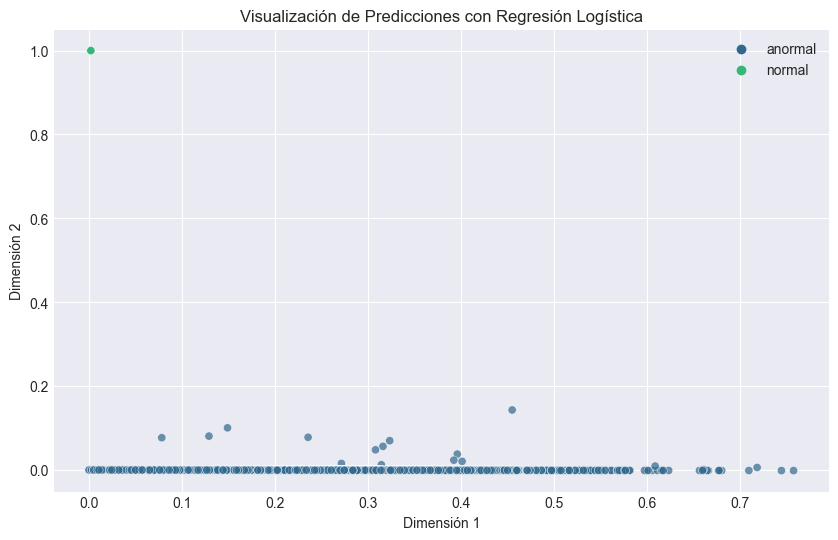

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

# Supongamos que ya tienes X_Tf y df_phising_vectorizado
# ...

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_Tf, df_phising_vectorizado['Etiqueta'], test_size=0.2, random_state=42)

# Reducir el número de dimensiones de la matriz de características (puedes ajustar esto según tus necesidades)
n_components = 100
X_train_svd = TruncatedSVD(n_components).fit_transform(X_train)

# Crear y ajustar el modelo de regresión logística
modelo_regresion = LogisticRegression()
modelo_regresion.fit(X_train_svd, y_train)

# Obtener las predicciones en el conjunto de prueba
X_test_svd = TruncatedSVD(n_components).fit_transform(X_test)
predicciones = modelo_regresion.predict(X_test_svd)

# Crear una gráfica de dispersión para visualizar las predicciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_svd[:, 0], y=X_test_svd[:, 1], hue=predicciones, palette="viridis", alpha=0.7)
plt.title("Visualización de Predicciones con Regresión Logística")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.legend()
plt.show()


## REALIZAMO UNA REGRESION LIENAL DE LOS PUNTOS

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Supongamos que X_svd es tu matriz de características reducida y agrupada por K-means
# Supongamos que y es tu variable objetivo con etiquetas 'normal' o 'anormal'

# Mapear las etiquetas a valores numéricos (0 o 1)
y_numerico = df_phising_vectorizado['Etiqueta'].map({'normal': 0, 'anormal': 1})

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_svd, y_numerico, test_size=0.2, random_state=42)

# Inicializar el modelo de clasificación logística
modelo_clasificacion = LogisticRegression()

# Ajustar el modelo con los datos de entrenamiento
modelo_clasificacion.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_clasificacion.predict(X_test)

# Evaluar el rendimiento del modelo
precision = accuracy_score(y_test, predicciones)

# Imprimir resultados
print(f"Precisión del modelo: {precision}")


Precisión del modelo: 1.0


#### PINTAMOS GRAFICA REGRESION LINEAL

c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


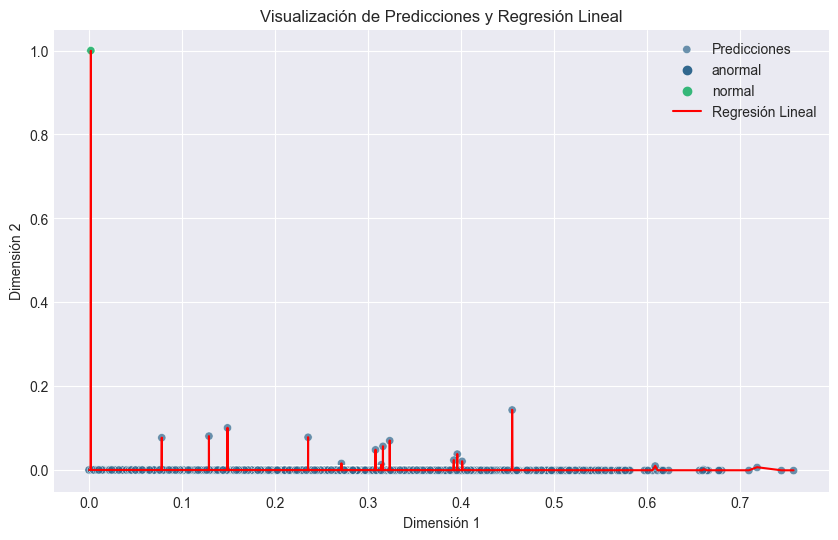

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import LabelEncoder



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_Tf, df_phising_vectorizado['Etiqueta'], test_size=0.2, random_state=42)

# Reducir el número de dimensiones de la matriz de características (puedes ajustar esto según tus necesidades)
n_components = 2
svd = TruncatedSVD(n_components)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

 #Obtener las predicciones en el conjunto de prueba
X_test_svd = TruncatedSVD(n_components).fit_transform(X_test)
predicciones_numerico = modelo_regresion.predict(X_test_svd)
label_encoder = LabelEncoder()
y_train_numerico = label_encoder.fit_transform(y_train)


# Redondear las predicciones a la etiqueta más cercana
predicciones_redondeadas = np.round(predicciones_numerico).astype(int)

# Convertir las predicciones redondeadas a etiquetas originales
predicciones_originales = label_encoder.inverse_transform(predicciones_redondeadas)


# Crear una gráfica de dispersión para visualizar las predicciones y la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_svd[:, 0], y=X_test_svd[:, 1], hue=predicciones_originales, palette="viridis", alpha=0.7, label="Predicciones")
sns.lineplot(x=X_test_svd[:, 0], y=modelo_regresion.predict(X_test_svd), color="red", label="Regresión Lineal")
plt.title("Visualización de Predicciones y Regresión Lineal")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.legend()
plt.show()


